# **Pembukaan Data Mining**

Penambangan data, atau **data mining**, adalah proses penggalian informasi berharga dan pola-pola yang tersembunyi dari kumpulan data besar menggunakan teknik statistik, matematika, dan kecerdasan buatan.

 Tujuan utama dari data mining adalah mengidentifikasi hubungan atau pola tertentu dalam data yang dapat membantu pengambilan keputusan strategis

 Standar proses data mining yang sering digunakan adalah CRISP-DM (Cross Industry Standard Process for Data Mining). Proses ini adalah kerangka kerja populer yang terdiri dari enam tahapan utama untuk mengelola proyek data mining secara sistematis. Berikut adalah penjelasan tahap-tahapnya:

- Business Understanding:

- Data Understanding:

- Data Preparation:

- Modeling:

- Evaluation:

- Deployment:

pada halaman ini , kita akan fokus pada Data Understanding pada tahap pengumpulan data, statistika deskriptif, dan visualisasi data



##**Business Understanding**


**Business Understanding** adalah tahap pertama dalam proses data mining yang bertujuan untuk memahami kebutuhan dan tujuan bisnis secara menyeluruh. Pada tahap ini,
fokus utama adalah mengidentifikasi masalah atau peluang bisnis yang ingin diselesaikan menggunakan data mining.

## **Data Understanding**

**Data Understanding** adalah tahap penting dalam proses data mining yang bertujuan untuk memahami data yang akan digunakan secara menyeluruh.
Pada tahap ini, data dikumpulkan dari berbagai sumber dan dieksplorasi untuk mengidentifikasi pola, struktur, atau kekhasan yang ada.

Proses ini melibatkan aktivitas seperti deskripsi data untuk mengetahui karakteristik dasar dataset (contoh: ukuran dataset, jumlah atribut, tipe data), penanganan data yang hilang (missing values), dan identifikasi data anomalistik (outliers).

Selain itu, pada tahap ini juga dilakukan analisis statistik awal seperti penghitungan rata-rata, median, standar deviasi, serta distribusi data untuk memahami penyebaran data.

Visualisasi data juga sering digunakan untuk mengungkap pola tersembunyi menggunakan grafik, histogram, atau scatter plot. Tujuan utama tahap ini adalah memastikan bahwa data siap untuk tahap berikutnya, yaitu Data Preparation,

pertama tama , kita akan mengumpulkan data dari berbagai sumber

### **Mengumpulkan Data Dari berbagai Sumber**

Berikut nya kita akan menginstall pymysql dan psycopg2, yang berfungsi sebagai konektor untuk basis data (database).

library pymysql digunakan untuk menghubungkan aplikasi Python dengan database MySQL atau MariaDB menggunakan protokol MySQL asli.

 Sementara itu, psycopg2 merupakan library yang digunakan untuk menghubungkan Python dengan database PostgreSQL,

   Kedua perintah ini menggunakan magic command %pip, yang umumnya digunakan dalam environment Jupyter Notebook untuk memastikan bahwa library dapat terpasang dan berjalan

In [3]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.8 MB/s eta 0:00:00


#### **Mengambil Dataset petal length dan petal width dari database mysql**

In [5]:

import pymysql

import numpy as np
import pandas as pd

def get_mysql_data():
    conn = pymysql.connect(
        host="pendatviomysql-39-projectvioo.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_nnGCVuLriFaCit_hSPr",
        database="myiris",
        port=20305
    )
    cursor = conn.cursor()
    # cursor.execute("USE myiris")  # Use the database
    cursor.execute("SELECT * FROM irismysql")  # Select all records from the table
    data = cursor.fetchall()  # Fetch all rows

    conn.close()

    # Convert to Python list
    data_list = [list(row) for row in data]

    # Convert to NumPy array
    data_numpy = np.array(data_list)

    return data_list

    # print(len(data_list))
    # print(data_numpy)

get_mysql_data()



[[1, 'Iris-setosa', 1.4, 0.2],
 [2, 'Iris-setosa', 14.0, 2.0],
 [3, 'Iris-setosa', 1.3, 0.2],
 [4, 'Iris-setosa', 1.5, 0.2],
 [5, 'Iris-setosa', 1.4, 0.2],
 [6, 'Iris-setosa', 1.7, 0.4],
 [7, 'Iris-setosa', 1.4, 0.3],
 [8, 'Iris-setosa', 1.5, 0.2],
 [9, 'Iris-setosa', 1.4, 0.2],
 [10, 'Iris-setosa', 1.5, 0.1],
 [11, 'Iris-setosa', 1.5, 0.2],
 [12, 'Iris-setosa', 1.6, 0.2],
 [13, 'Iris-setosa', 1.4, 0.1],
 [14, 'Iris-setosa', 1.1, 0.1],
 [15, 'Iris-setosa', 1.2, 0.2],
 [16, 'Iris-setosa', 1.5, 0.4],
 [17, 'Iris-setosa', 1.3, 0.4],
 [18, 'Iris-setosa', 1.4, 0.3],
 [19, 'Iris-setosa', 1.7, 0.3],
 [20, 'Iris-setosa', 1.5, 0.3],
 [21, 'Iris-setosa', 1.7, 0.2],
 [22, 'Iris-setosa', 1.5, 0.4],
 [23, 'Iris-setosa', 1.0, 0.2],
 [24, 'Iris-setosa', 1.7, 0.5],
 [25, 'Iris-setosa', 1.9, 0.2],
 [26, 'Iris-setosa', 1.6, 0.2],
 [27, 'Iris-setosa', 1.6, 0.4],
 [28, 'Iris-setosa', 1.5, 0.2],
 [29, 'Iris-setosa', 1.4, 0.2],
 [30, 'Iris-setosa', 1.6, 0.2],
 [31, 'Iris-setosa', 1.6, 0.2],
 [32, 'Iris-seto

#### **Mengambil Dataset sepal length dan sepal width dari database postgresql**

In [6]:
import psycopg2
import numpy as np

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-30810f3a-projectvioo.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_zzD9DhqapmhcWhqwe5C",
        database="defaultdb",
        port=20305
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_post")  # Select all records from the table
    data = cursor.fetchall()  # Fetch all rows
    cursor.close()
    conn.close()

    # Convert to Python list
    data_list = [list(row) for row in data]

    # Convert to NumPy array
    data_numpy = np.array(data_list)

    return data_list

get_pg_data()


[[1, 'Iris-setosa', 5.1, 3.5],
 [3, 'Iris-setosa', 4.7, 3.2],
 [4, 'Iris-setosa', 4.6, 3.1],
 [5, 'Iris-setosa', 5.0, 3.6],
 [6, 'Iris-setosa', 5.4, 3.9],
 [7, 'Iris-setosa', 4.6, 3.4],
 [8, 'Iris-setosa', 5.0, 3.4],
 [9, 'Iris-setosa', 4.4, 2.9],
 [10, 'Iris-setosa', 4.9, 3.1],
 [11, 'Iris-setosa', 5.4, 3.7],
 [12, 'Iris-setosa', 4.8, 3.4],
 [13, 'Iris-setosa', 4.8, 3.0],
 [14, 'Iris-setosa', 4.3, 3.0],
 [15, 'Iris-setosa', 5.8, 4.0],
 [16, 'Iris-setosa', 5.7, 4.4],
 [17, 'Iris-setosa', 5.4, 3.9],
 [18, 'Iris-setosa', 5.1, 3.5],
 [19, 'Iris-setosa', 5.7, 3.8],
 [20, 'Iris-setosa', 5.1, 3.8],
 [21, 'Iris-setosa', 5.4, 3.4],
 [22, 'Iris-setosa', 5.1, 3.7],
 [23, 'Iris-setosa', 4.6, 3.6],
 [24, 'Iris-setosa', 5.1, 3.3],
 [25, 'Iris-setosa', 4.8, 3.4],
 [26, 'Iris-setosa', 5.0, 3.0],
 [27, 'Iris-setosa', 5.0, 3.4],
 [28, 'Iris-setosa', 5.2, 3.5],
 [29, 'Iris-setosa', 5.2, 3.4],
 [30, 'Iris-setosa', 4.7, 3.2],
 [31, 'Iris-setosa', 4.8, 3.1],
 [32, 'Iris-setosa', 5.4, 3.4],
 [33, 'Iris-seto

#### **Menggabungkan Data dari dua database berbeda**


In [16]:

import pandas as pd
# buat datafrrame

columns = ['id', 'Class', 'sepal_length', 'sepal_width']
data_mysql = pd.DataFrame(get_mysql_data(), columns=columns)

columns = ['id', 'Class', 'petal_length', 'petal_width']
data_pg = pd.DataFrame(get_pg_data(), columns=columns)

# print(data_mysql)

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(data_mysql, data_pg, on=["id", "Class"], how="inner")
print(df_merged)


      id           Class  sepal_length  sepal_width  petal_length  petal_width
0      1     Iris-setosa           1.4          0.2           5.1          3.5
1      2     Iris-setosa          14.0          2.0          40.9         30.0
2      3     Iris-setosa           1.3          0.2           4.7          3.2
3      4     Iris-setosa           1.5          0.2           4.6          3.1
4      5     Iris-setosa           1.4          0.2           5.0          3.6
..   ...             ...           ...          ...           ...          ...
146  147  Iris-virginica           5.0          1.9           6.3          2.5
147  148  Iris-virginica           5.2          2.0           6.5          3.0
148  149  Iris-virginica           5.4          2.3           6.2          3.4
149  150  Iris-virginica           5.1          1.8           5.9          3.0
150  151             ???           5.1          3.2           5.8          1.0

[151 rows x 6 columns]


#### **Melakukan statistik deskriptif**

In [8]:

df_numerical = df_merged.copy(deep=True)

# Menghilangkan kolom id dan Class
df_numerical = df_numerical.drop(['id', 'Class'], axis=1)

# Melakukan statistik deskriptif
stat_desc = df_numerical.describe()

# Menampilkan hasil
print("Statistik Deskriptif:")
print(stat_desc)

Statistik Deskriptif:
       sepal_length  sepal_width  petal_length  petal_width
count    151.000000   151.000000    151.000000   151.000000
mean       3.850993     1.223841      6.081457     3.219205
std        1.938552     0.776033      2.968376     2.242312
min        1.000000     0.100000      4.300000     1.000000
25%        1.600000     0.300000      5.100000     2.800000
50%        4.400000     1.300000      5.800000     3.000000
75%        5.100000     1.800000      6.400000     3.300000
max       14.000000     3.200000     40.900000    30.000000


## **Visualisasi Data**

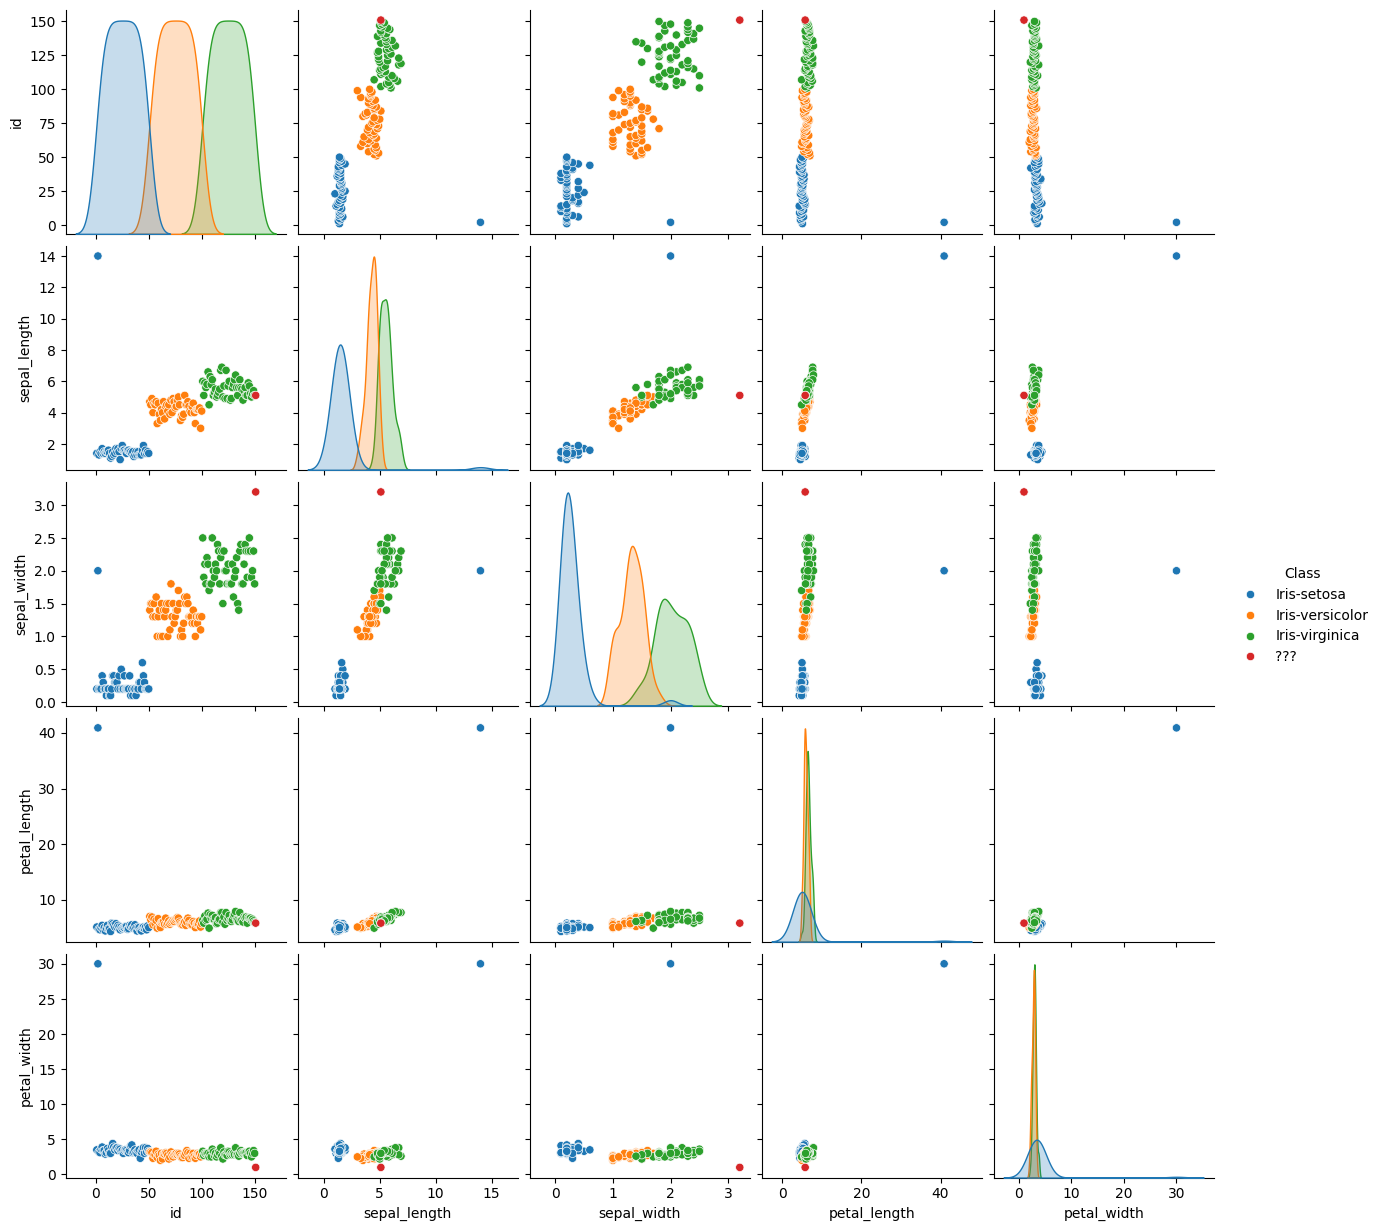

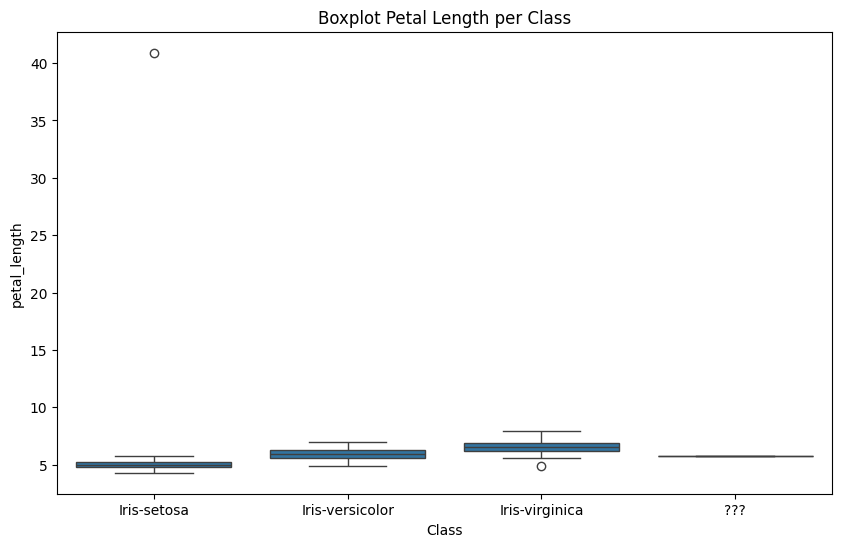

In [18]:

# visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt



# Scatter plot antar variabel

sns.pairplot(df_merged, hue="Class")
plt.show()

# Boxplot petal length per Class
plt.figure(figsize=(10, 6))
sns.boxplot(x="Class", y="petal_length", data=df_merged)
plt.title("Boxplot Petal Length per Class")
plt.show()